In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [3]:
tasmin = pd.read_csv('tasmin.csv')

In [4]:

tasmin = tasmin.drop(['time', 'projection_y_coordinate', 'projection_x_coordinate', 'bnds','time_bnds', 'transverse_mercator', 'projection_y_coordinate_bnds', 'projection_x_coordinate_bnds'], axis = 1)
tasmin = tasmin.dropna(subset = 'tasmin', axis=0)

In [5]:
tasmin.head(-1)

,tasmin,latitude,longitude
418,8.065388,50.189194,-5.327663
419,8.065388,50.189194,-5.327663
420,7.800843,50.198694,-4.977914
421,7.800843,50.198694,-4.977914
498,7.716912,50.423247,-4.991985
...,...,...,...
3950,5.568577,60.345361,-1.320520
3951,5.568577,60.345361,-1.320520
4028,5.763741,60.569832,-1.315814
4029,5.763741,60.569832,-1.315814


In [6]:
ds = xr.open_dataset('rainfall_hadukgrid_uk_25km_ann-30y_199101-202012.nc')

In [7]:
ds

<xarray.Dataset>
Dimensions:                       (time: 1, projection_y_coordinate: 52,
                                   projection_x_coordinate: 39, bnds: 2)
Coordinates:
  * time                          (time) datetime64[ns] 1991-07-01
  * projection_y_coordinate       (projection_y_coordinate) int32 -87500 ... ...
  * projection_x_coordinate       (projection_x_coordinate) int32 -187500 ......
    latitude                      (projection_y_coordinate, projection_x_coordinate) float64 ...
    longitude                     (projection_y_coordinate, projection_x_coordinate) float64 ...
Dimensions without coordinates: bnds
Data variables:
    rainfall                      (time, projection_y_coordinate, projection_x_coordinate) float64 ...
    transverse_mercator           int32 ...
    time_bnds                     (time, bnds) datetime64[ns] ...
    projection_y_coordinate_bnds  (projection_y_coordinate, bnds) float64 ...
    projection_x_coordinate_bnds  (projection_x_coordinate, bnds) float64 ...
Attributes:
    comment:        annual resolution gridded climate observations
    creation_date:  2022-03-17T13:09:48
    frequency:      ann-30y
    institution:    Met Office
    lta_period:     1991-2020
    references:     doi: 10.1002/gdj3.78
    short_name:     annual_rainfall_climatology
    source:         HadUK-Grid_v1.1.0.0
    title:          Gridded surface climate observations data for the UK
    version:        v20220310
    Conventions:    CF-1.5

In [8]:
ds.data_vars

Data variables:
    rainfall                      (time, projection_y_coordinate, projection_x_coordinate) float64 ...
    transverse_mercator           int32 -2147483647
    time_bnds                     (time, bnds) datetime64[ns] 1991-01-01 2020...
    projection_y_coordinate_bnds  (projection_y_coordinate, bnds) float64 -1e...
    projection_x_coordinate_bnds  (projection_x_coordinate, bnds) float64 -2e...

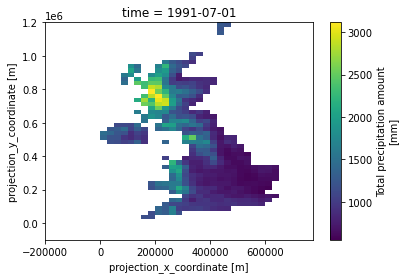

In [9]:
ds.rainfall.plot()

In [10]:
rf = xr.open_dataset('tasmin_hadukgrid_uk_25km_mon-30y_199101-202012.nc')

In [11]:
rf.head()

<xarray.Dataset>
Dimensions:                       (time: 5, projection_y_coordinate: 5,
                                   projection_x_coordinate: 5, bnds: 2)
Coordinates:
  * time                          (time) datetime64[ns] 1991-01-16 ... 1991-0...
  * projection_y_coordinate       (projection_y_coordinate) int32 -87500 ... ...
  * projection_x_coordinate       (projection_x_coordinate) int32 -187500 ......
    latitude                      (projection_y_coordinate, projection_x_coordinate) float64 ...
    longitude                     (projection_y_coordinate, projection_x_coordinate) float64 ...
    month_number                  (time) int64 ...
Dimensions without coordinates: bnds
Data variables:
    tasmin                        (time, projection_y_coordinate, projection_x_coordinate) float64 ...
    transverse_mercator           int32 ...
    time_bnds                     (time, bnds) datetime64[ns] ...
    projection_y_coordinate_bnds  (projection_y_coordinate, bnds) float64 ...
    projection_x_coordinate_bnds  (projection_x_coordinate, bnds) float64 ...
Attributes:
    comment:        Monthly resolution gridded climate observations
    creation_date:  2022-03-17T11:03:06
    frequency:      mon-30y
    institution:    Met Office
    lta_period:     1991-2020
    references:     doi: 10.1002/gdj3.78
    short_name:     monthly_mintemp_climatology
    source:         HadUK-Grid_v1.1.0.0
    title:          Gridded surface climate observations data for the UK
    version:        v20220310
    Conventions:    CF-1.5

In [13]:
rf1 = rf.to_dataframe().to_csv('rf.csv')

In [16]:
rf1 = pd.read_csv('rf.csv')

12